In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

In [27]:
wineDF = pd.read_csv('../data/winequality-white.csv', sep=';')
wineDF.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [3]:
# 결측치 확인
wineDF.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [4]:
# 중복값 확인 및 제거
wineDF.duplicated().sum()
wineDF = wineDF.drop_duplicates()

In [59]:
# 상관계수 높은 피쳐 찾기
corrDF = pd.DataFrame(wineDF.corr())
abs(corrDF['quality']).sort_values(ascending=False)

quality                 1.000000
alcohol                 0.435575
density                 0.307123
chlorides               0.209934
volatile acidity        0.194723
total sulfur dioxide    0.174737
fixed acidity           0.113663
pH                      0.099427
residual sugar          0.097577
sulphates               0.053678
citric acid             0.009209
free sulfur dioxide     0.008158
Name: quality, dtype: float64

In [55]:
wineDF['alcohol'].value_counts(),wineDF['alcohol'].min(),wineDF['alcohol'].max() # 8.0 ~ 14.2 5개로 나누기

(alcohol
 9.400000     229
 9.500000     228
 9.200000     199
 9.000000     185
 10.000000    162
             ... 
 14.050000      1
 11.366667      1
 11.066667      1
 11.350000      1
 12.050000      1
 Name: count, Length: 103, dtype: int64,
 8.0,
 14.2)

In [57]:
wineDF['chlorides'].value_counts()

chlorides
0.044    201
0.036    200
0.042    184
0.040    182
0.046    181
        ... 
0.217      1
0.148      1
0.158      1
0.099      1
0.136      1
Name: count, Length: 160, dtype: int64

In [29]:
featureDF = wineDF[['alcohol', 'density']]
targetSR = wineDF['quality']

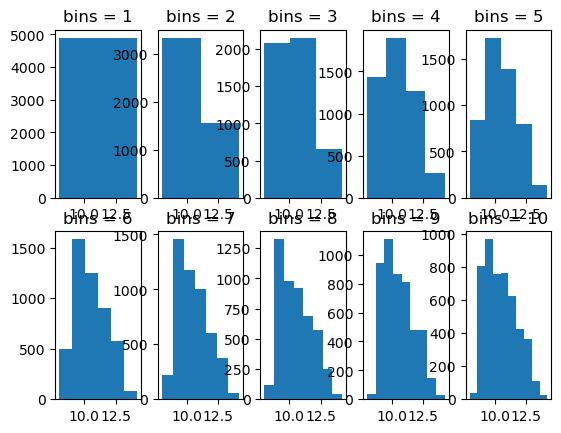

In [49]:
for i in range(1,11):
    plt.subplot(2,5,i)
    plt.hist(wineDF['alcohol'], bins = i)
    plt.title(f'bins = {i}')
# bins = 5일때 정규분포와 가장 비슷

In [64]:
wineDF['alcohol'].value_counts(),wineDF['alcohol'].min(),wineDF['alcohol'].max() # 8.0 ~ 14.2 5개로 나누기

(alcohol
 9.400000     229
 9.500000     228
 9.200000     199
 9.000000     185
 10.000000    162
             ... 
 14.050000      1
 11.366667      1
 11.066667      1
 11.350000      1
 12.050000      1
 Name: count, Length: 103, dtype: int64,
 8.0,
 14.2)

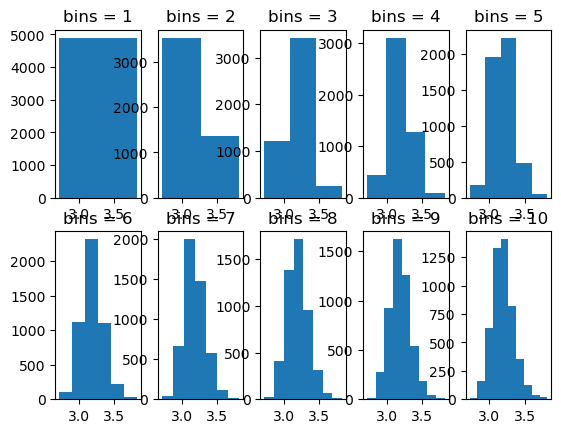

In [63]:
for i in range(1,11):
    plt.subplot(2,5,i)
    plt.hist(wineDF['pH'], bins = i)
    plt.title(f'bins = {i}')
# bins = 6 일때 가장 정규분포에 가깝다.

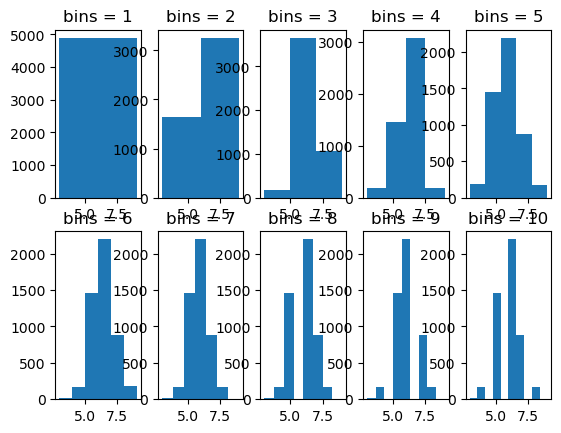

In [51]:
for i in range(1,11):
    plt.subplot(2,5,i)
    plt.hist(targetSR, bins = i)
    plt.title(f'bins = {i}')
# bins = 5일때 정규분포와 가장 비슷

In [7]:
x_train,x_test,y_train,y_test = train_test_split(featureDF,targetSR, test_size = 0.2, stratify=targetSR)
# x_train,x_val,y_train,y_val = train_test_split(x_train,y_train, test_size = 0.1, stratify=y_train)

### 아는 스케일링 방법 다 써보기 !!!

In [8]:
sta_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()
ro_scaler = RobustScaler()

sta_scaler.fit(x_train)
minmax_scaler.fit(x_train)
ro_scaler.fit(x_train)

RobustScaler()

In [9]:
sta_scaled_x_train = sta_scaler.transform(x_train)
# sta_scaled_x_val = sta_scaler.transform(x_val)
sta_scaled_x_test = sta_scaler.transform(x_test)

minmax_scaled_x_train = minmax_scaler.transform(x_train)
# minmax_scaled_x_val = minmax_scaler.transform(x_val)
minmax_scaled_x_test = minmax_scaler.transform(x_test)

ro_scaled_x_train = ro_scaler.transform(x_train)
# ro_scaled_x_val = ro_scaler.transform(x_val)
ro_scaled_x_test = ro_scaler.transform(x_test)

### 학습 방법 선택

max_score : 0.5220680958385876
k value : 93


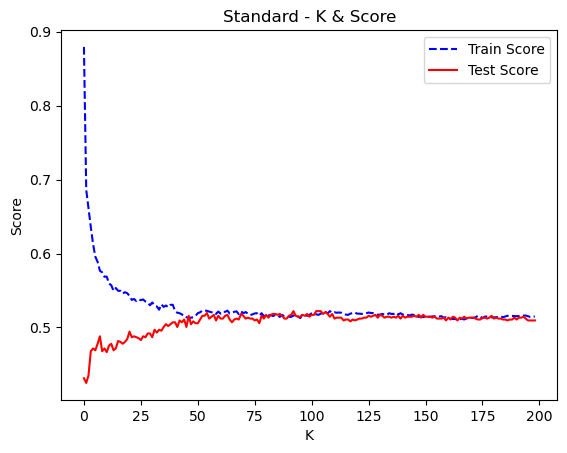

In [10]:
test_scoreList = []
train_scoreList = []
kList = []
scoreList = []
max_score = 0.4

for k in range(1, 200):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(sta_scaled_x_train, y_train)
    test_scoreList.append(model.score(sta_scaled_x_test,y_test))
    train_scoreList.append(model.score(sta_scaled_x_train, y_train))

max_idx = test_scoreList.index(max(test_scoreList))+1
print(f'max_score : {max(test_scoreList)}')
print(f'k value : {max_idx}')

kList.append(max_idx)
scoreList.append(max(test_scoreList))

# K 갯수에  따른 학습용/테스트용 점수 시각화
plt.plot(train_scoreList, "b--", label = "Train Score")
plt.plot(test_scoreList, "r-", label = "Test Score")
plt.title("Standard - K & Score")
plt.xlabel("K")
plt.ylabel("Score")
plt.legend()
plt.show()

max_score : 0.519546027742749
k value : 80


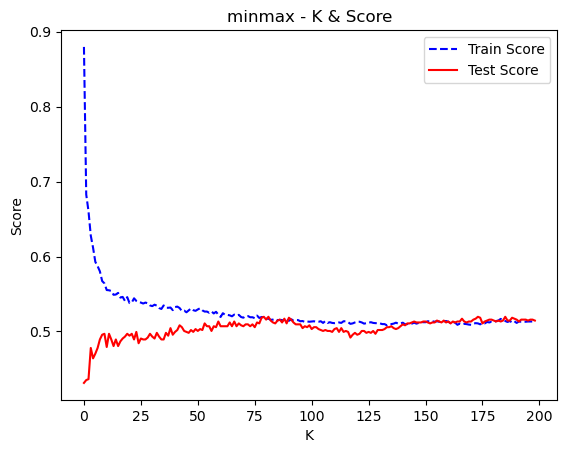

In [11]:
test_scoreList = []
train_scoreList = []

max_score = 0.4

for k in range(1, 200):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(minmax_scaled_x_train, y_train)
    test_scoreList.append(model.score(minmax_scaled_x_test,y_test))
    train_scoreList.append(model.score(minmax_scaled_x_train, y_train))

max_idx = test_scoreList.index(max(test_scoreList))+1
print(f'max_score : {max(test_scoreList)}')
print(f'k value : {max_idx}')

kList.append(max_idx)
scoreList.append(max(test_scoreList))
        

# K 갯수에  따른 학습용/테스트용 점수 시각화
plt.plot(train_scoreList, "b--", label = "Train Score")
plt.plot(test_scoreList, "r-", label = "Test Score")
plt.title("minmax - K & Score")
plt.xlabel("K")
plt.ylabel("Score")
plt.legend()
plt.show()

max_score : 0.5233291298865069
k value : 58


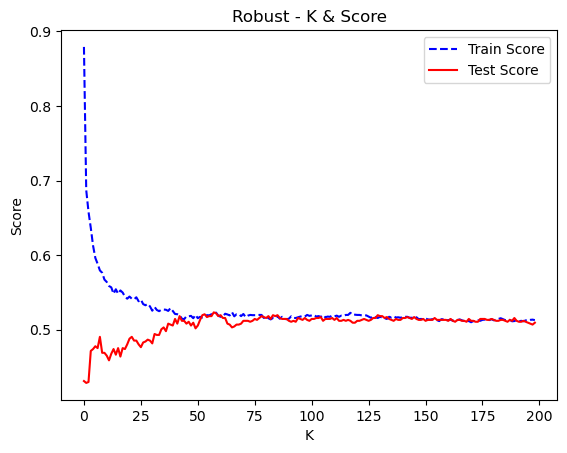

In [12]:
test_scoreList = []
train_scoreList = []

max_score = 0.4

for k in range(1, 200):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(ro_scaled_x_train, y_train)
    test_scoreList.append(model.score(ro_scaled_x_test,y_test))
    train_scoreList.append(model.score(ro_scaled_x_train, y_train))

max_idx = test_scoreList.index(max(test_scoreList))+1
print(f'max_score : {max(test_scoreList)}')
print(f'k value : {max_idx}')

kList.append(max_idx)
scoreList.append(max(test_scoreList))

# K 갯수에  따른 학습용/테스트용 점수 시각화
plt.plot(train_scoreList, "b--", label = "Train Score")
plt.plot(test_scoreList, "r-", label = "Test Score")
plt.title("Robust - K & Score")
plt.xlabel("K")
plt.ylabel("Score")
plt.legend()
plt.show()

In [13]:
model2 = SVC()

model2.fit(sta_scaled_x_train,y_train)
model2.score(sta_scaled_x_test, y_test)

0.49558638083228246

In [14]:
model2.fit(minmax_scaled_x_train,y_train)
model2.score(minmax_scaled_x_test, y_test)

0.4943253467843632

In [15]:
model2.fit(ro_scaled_x_train,y_train)
model2.score(ro_scaled_x_test, y_test)

0.49810844892812106

In [16]:
model3 = LogisticRegression()

model3.fit(sta_scaled_x_train,y_train)
model3.score(sta_scaled_x_test, y_test)

0.510718789407314

In [17]:
model3.fit(minmax_scaled_x_train,y_train)
model3.score(minmax_scaled_x_test, y_test)

0.5031525851197982

In [18]:
model3.fit(ro_scaled_x_train,y_train)
model3.score(ro_scaled_x_test, y_test)

0.5081967213114754

### 적합한 모델 선택
- 데이터셋 설정할 때마다 가장 큰 정확도를 가진 모델이 달라짐
- KNN으로 설정

In [24]:
max_score = max(scoreList)
max_k = kList[scoreList.index(max_score)]

model = KNeighborsClassifier(n_neighbors=max_k)

print("Standard 검증용 데이터 정확도:", scoreList[0])
print("MinMax 검증용 데이터 정확도:", scoreList[1])
print("Robust 검증용 데이터 정확도:", scoreList[2])

if kList.index(max_k) == 0:
    model.fit(sta_scaled_x_train, y_train)
    sta_accuracy = model.score(sta_scaled_x_test,y_test)
    print("Standard 선택")

elif kList.index(max_k) == 1:
    model.fit(minmax_scaled_x_train, y_train)
    minmax_accuracy = model.score(minmax_scaled_x_test,y_test)
    print("MinMax 선택")
else:
    model.fit(ro_scaled_x_train, y_train)
    ro_accuracy = model.score(ro_scaled_x_test,y_test)
    print("Robust 선택")

Standard 검증용 데이터 정확도: 0.5220680958385876
MinMax 검증용 데이터 정확도: 0.519546027742749
Robust 검증용 데이터 정확도: 0.5233291298865069
Robust 선택


In [20]:
alcohol, density = map(float,input('alchol과 density를 입력하세요 (예시 : 13.4,0.97 )').split(','))
newdata = pd.DataFrame([[alcohol,density]], columns=['alcohol','density'])
newdata

,alcohol,density
0,16.0,1.0


In [25]:
if kList.index(max_k) == 0:
    scaled_newdata = sta_scaler.transform(newdata)  
elif kList.index(max_k) == 1:
    scaled_newdata = minmax_scaler.transform(newdata)
else:
    scaled_newdata = ro_scaler.transform(newdata) 

In [22]:
print(f'해당 와인은 {model.predict(scaled_newdata)[0]}등급에 가깝습니다.')

해당 와인은 6등급에 가깝습니다.
